<a href="https://colab.research.google.com/github/averma12/DL-from-scratch/blob/master/Matmul.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
! pip uninstall fastai

Uninstalling fastai-1.0.48:
  Would remove:
    /usr/local/lib/python3.6/dist-packages/fastai-1.0.48.dist-info/*
    /usr/local/lib/python3.6/dist-packages/fastai/*
Proceed (y/n)? y
  Successfully uninstalled fastai-1.0.48


In [0]:
! pip install fastai

    100% |████████████████████████████████| 215kB 25.0MB/s 
    100% |████████████████████████████████| 17.3MB 2.4MB/s 
featuretools 0.4.1 has requirement pandas>=0.23.0, but you'll have pandas 0.22.0 which is incompatible.
albumentations 0.1.12 has requirement imgaug<0.2.7,>=0.2.5, but you'll have imgaug 0.2.8 which is incompatible.
  Found existing installation: numpy 1.14.6
    Uninstalling numpy-1.14.6:
      Successfully uninstalled numpy-1.14.6


In [0]:
from pathlib import Path
from IPython.core.debugger import set_trace
from fastai import datasets
import pickle,gzip,math,torch,matplotlib as mpl
import matplotlib.pyplot as plt
from torch import tensor

MNIST_URL = "http://deeplearning.net/data/mnist/mnist.pkl"

In [2]:
path = datasets.download_data(MNIST_URL, ext='.gz')
path

PosixPath('/root/.fastai/data/mnist.pkl.gz')

In [0]:
with gzip.open(path, 'rb') as f:
    ((x_train, y_train), (x_valid, y_valid), _) = pickle.load(f, encoding='latin-1')

In [6]:
x_train,y_train,x_valid,y_valid = map(tensor, (x_train,y_train,x_valid,y_valid))
n,c = x_train.shape
x_train, x_train.shape, y_train, y_train.shape, y_train.min(), y_train.max()

(tensor([[0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         ...,
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.],
         [0., 0., 0.,  ..., 0., 0., 0.]]),
 torch.Size([50000, 784]),
 tensor([5, 0, 4,  ..., 8, 4, 8]),
 torch.Size([50000]),
 tensor(0),
 tensor(9))

In [0]:
assert x_train.shape[0]==y_train.shape[0]==50000
#test_eq(x_train.shape[1],28*28)
#test_eq(y_train.min(),0)
#test_eq(y_train.max(),9)

In [0]:
mpl.rcParams['image.cmap'] = 'gray'

In [0]:
img = x_train[0]

In [10]:
type(img)

torch.Tensor

In [11]:
img.shape

torch.Size([784])

In [12]:
#We will create a copy and view it as a 2D image in matplotlib
img.view(28,28).type()

'torch.FloatTensor'

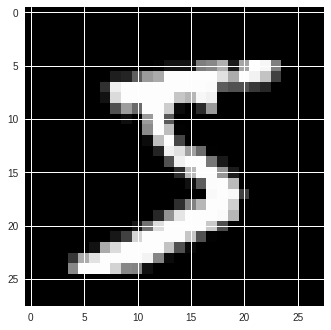

In [13]:
plt.imshow(img.view(28,28))

In [0]:
#Multiplication between 2 matrices i.e 2 2D torch tensors
def matmul(a,b):
    ar,ac = a.shape # n_rows * n_cols
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            for k in range(ac): # or br
                c[i,j] += a[i,k] * b[k,j]
    return c

**Initial Python model**

In [0]:
weights = torch.randn(784,10)/math.sqrt(784)

In [0]:
bias = torch.zeros(10)

In [17]:
x_valid[:5].shape

torch.Size([5, 784])

In [0]:
m1 = x_valid[:5]
m2 = weights

In [19]:
m1.shape,m2.shape

(torch.Size([5, 784]), torch.Size([784, 10]))

In [21]:
%time t1 = matmul(m1,m2)

CPU times: user 646 ms, sys: 30 µs, total: 646 ms
Wall time: 658 ms


In [22]:
t1.shape

torch.Size([5, 10])

In [0]:
#elementwise matrix multiplication
def matmul_elem(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
        for j in range(bc):
            # Any trailing ",:" can be removed
            c[i,j] = (a[i,:] * b[:,j]).sum()
    return c

In [24]:
%timeit -n 10 _=matmul_elem(m1, m2)

10 loops, best of 3: 1.08 ms per loop


In [0]:
def test(a,b,cmp,cname=None):
    if cname is None: cname=cmp.__name__
    assert cmp(a,b),f"{cname}:\n{a}\n{b}"

In [0]:
def near(a,b): return torch.allclose(a, b, rtol=1e-3, atol=1e-5)
def test_near(a,b): test(a,b,near)

In [0]:
test_near(t1,matmul_elem(m1, m2))

In [28]:
matmul_elem(m1, m2)

tensor([[ 0.2068, -0.3805,  0.2279, -0.1680, -0.1770, -0.0852, -0.8314,  0.0937,
         -0.1706,  0.0458],
        [ 0.0628, -0.0366, -0.1749, -0.3705, -0.4550,  0.0281, -0.8768,  0.3512,
         -0.0212, -0.3922],
        [-0.0764,  0.1041, -0.1743,  0.1138, -0.7409, -0.0708, -0.0783,  0.2096,
          0.0053, -0.0602],
        [ 0.4787, -0.0743, -0.2864,  0.1847, -0.1658,  0.1295,  0.0594,  0.0071,
         -0.2655, -0.0950],
        [-0.0627, -0.1527, -0.5633,  0.4161, -0.4935, -0.1257, -0.1292, -0.1972,
         -0.3053,  0.0576]])

In [29]:
t1

tensor([[ 0.2068, -0.3805,  0.2279, -0.1680, -0.1770, -0.0852, -0.8314,  0.0937,
         -0.1706,  0.0458],
        [ 0.0628, -0.0366, -0.1749, -0.3705, -0.4550,  0.0281, -0.8768,  0.3512,
         -0.0212, -0.3922],
        [-0.0764,  0.1041, -0.1743,  0.1138, -0.7409, -0.0708, -0.0783,  0.2096,
          0.0053, -0.0602],
        [ 0.4787, -0.0743, -0.2864,  0.1847, -0.1658,  0.1295,  0.0594,  0.0071,
         -0.2655, -0.0950],
        [-0.0627, -0.1527, -0.5633,  0.4161, -0.4935, -0.1257, -0.1292, -0.1972,
         -0.3053,  0.0576]])

In [30]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [31]:
c.shape

torch.Size([3])

In [0]:
c.unsqueeze(0),c.unsqueeze(0).shape

(tensor([[10., 20., 30.]]), torch.Size([1, 3]))

In [0]:
c.unsqueeze(1).shape

torch.Size([3, 1])

**To be completed**

**Broadcasting**

In [0]:
a = tensor([10,6,-4])

In [34]:
a > 0

tensor([1, 1, 0], dtype=torch.uint8)

In [35]:
c = tensor([10.,20,30]); c

tensor([10., 20., 30.])

In [36]:
m = tensor([[1., 2, 3], [4,5,6], [7,8,9]]); m

tensor([[1., 2., 3.],
        [4., 5., 6.],
        [7., 8., 9.]])

In [37]:
m.shape,c.shape

(torch.Size([3, 3]), torch.Size([3]))

In [38]:
m + c

tensor([[11., 22., 33.],
        [14., 25., 36.],
        [17., 28., 39.]])

In [0]:
def matmul_broadcast(a,b):
    ar,ac = a.shape
    br,bc = b.shape
    assert ac==br
    c = torch.zeros(ar, bc)
    for i in range(ar):
#       c[i,j] = (a[i,:]          * b[:,j]).sum() # previous
        c[i]   = (a[i  ].unsqueeze(-1) * b).sum(dim=0)
    return c

In [40]:
%timeit -n 10 _=matmul_broadcast(m1, m2)

10 loops, best of 3: 285 µs per loop


In [42]:
885000/285

3105.2631578947367

**Einstein summation and matmul are covered in another notebook. Matmul is the fastest of all matrix operations**